In [1]:
from transformers import GPT2LMHeadModel

In [2]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # 124M parameters model.
sd_model = model_hf.state_dict() # returns the tensor state_dict of the model.

for k, v in sd_model.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [4]:
sd_model['transformer.wte.weight'].view(-1)[:50] # token embeddings.

tensor([-0.1101, -0.0393,  0.0331,  0.1338, -0.0485, -0.0789, -0.2398, -0.0895,
         0.0253, -0.1074, -0.1811, -0.0672,  0.0739, -0.0161,  0.0117,  0.1245,
        -0.0020, -0.0815,  0.0338,  0.2365, -0.0771, -0.0346, -0.0234, -0.0928,
         0.1336, -0.0661, -0.0502,  0.0464, -0.0710, -0.0907,  0.0428, -0.0883,
         0.0978, -0.1381, -0.1403, -0.1256, -0.3174, -0.1092, -0.0708,  0.0584,
         0.0079, -0.0297,  0.1430,  0.0311, -0.0313,  0.1102,  0.0549, -0.0589,
         0.0356, -0.1533])

In [5]:
sd_model['transformer.wpe.weight'].view(-1)[:50] # positional embeddings.

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042,  0.0135, -0.0363,  0.0193, -0.0259,
         0.0080,  0.0085, -0.0199,  0.0668,  0.0071, -0.0266,  0.0208, -0.0337,
        -0.0083,  0.0099, -0.0274, -0.0991, -0.7525,  0.0236, -0.0305,  0.0775,
         0.0034,  0.0071,  0.0265, -0.0012,  0.1122, -0.0021, -0.0225, -0.0223,
         0.0236,  0.3978])

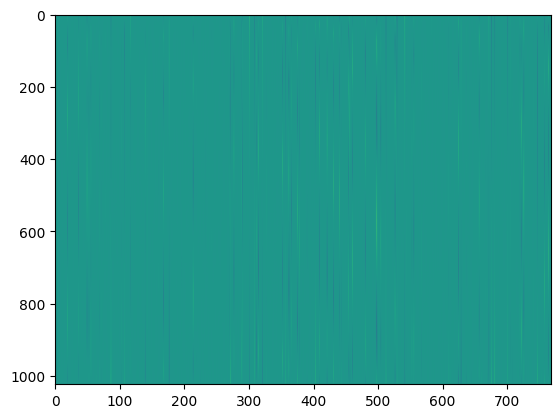

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_model['transformer.wpe.weight'], cmap='viridis', aspect='auto') # PE represents the sinusoidal positional representation. 
plt.show()

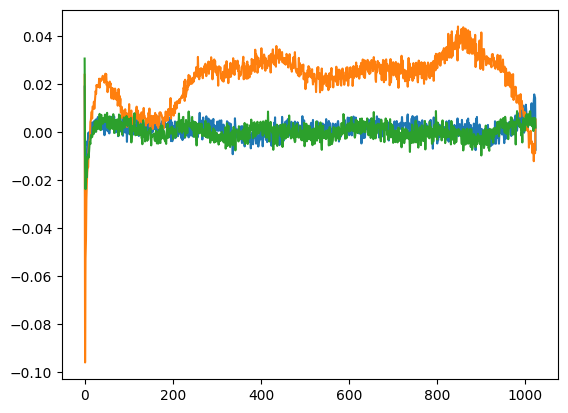

In [19]:
plt.plot(sd_model['transformer.wpe.weight'][:,50])
plt.plot(sd_model['transformer.wpe.weight'][:,250])
plt.plot(sd_model['transformer.wpe.weight'][:,500])

The plot above shows the trained positional embeddings of the GPT-2 model. We know that positional embeddings is a concatenation of positional encodings and token embeddings. Positional encodings remain constant throughout the training process, while token embeddings are learned during training. The fluctuation of the positional embeddings in the above figure means that the model is not trained completely and the plot stabilizes as the model is trained further.